In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_preprocessing.image import ImageDataGenerator
import scipy.ndimage
import pandas as pd

## Cargar Datos

In [2]:
# Descargar el mnist de Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
y_train = pd.Series(y_train, dtype="category")
y_test = pd.Series(y_test, dtype="category")

## Keras Image Data Generator

El DataGenerator de Keras permite en cada iteración, aplicar transformaciones al batch donde se pueden rotar, hacer zoom o bien mover las imágenes del dataset para generar variedad. Importante: Los datos “aumentados” utilizados para entrenar el modelo requieren un número mayor de epochs. El DataGenerator busca eliminar el overfitting.

In [4]:
# creacion de Tensores 4D
x_train = tf.keras.preprocessing.image.img_to_array(x_train, data_format=None, dtype=None)
x_train = (np.expand_dims(x_train, axis=3))

x_test = tf.keras.preprocessing.image.img_to_array(x_test, data_format=None, dtype=None)
x_test = (np.expand_dims(x_test, axis=3))

# configuracion de entrenamiento
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

x_train.shape

(60000, 28, 28, 1)

## Arquitetura Perceptron

In [5]:
# tamano de la imagen de entrada

# definicion del modelo Perceptron
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(300, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

# Construir el modelo y ver la arquitectura
model.build((28,28))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Entrenar la Red Neuronal

In [ ]:
# Definir los parametros de optimizacion y perdida del modelo (con CrossValidation)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ejecutar training
# se usan los datagens como parametros.
history = model.fit(train_datagen.flow(x_train,y_train), 
                    epochs=100,
                    verbose=1, 
                    shuffle=True,
                    validation_data=test_datagen.flow(x_test,y_test)
                   )

Train for 1875 steps, validate for 313 steps
Epoch 1/100


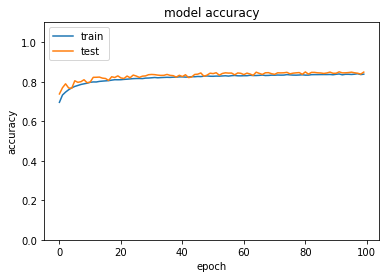

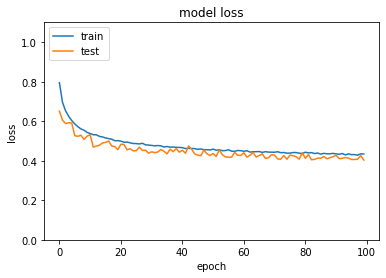

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

## Evaluar el Modelo

In [38]:
# Obtener el score obtenido del modelo
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

10000/10000 [==============================] - 0s 20us/sample - loss: 85.4751 - acc: 0.7395
Test loss: 85.47508261413574
Test accuracy: 0.7395


## Predecir una Imagen

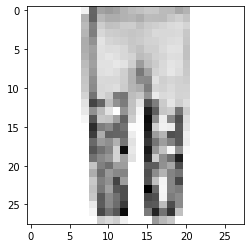

[[2.4328260e-03 9.9086738e-01 7.2838644e-05 6.1400114e-03 1.2114800e-04
  7.4254530e-10 3.4703262e-04 2.7925893e-31 1.8683262e-05 7.1000139e-10]]

Prediccion: Trouser


In [40]:
# obtener una imagen del dataset
(_, _), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

import random

ind = random.randint(10,1000)

img = x_test[ind]

# imprimir
plt.imshow(img, cmap='Greys')
plt.show()

# normalizar la imagen y expandirla
img = img.astype("float32") / 255
img = img.reshape(28,28,1)

# generar las probabilidades
y_pred = model.predict(np.array([img]))

# imprimir la lista de probabilidades
print(y_pred)

labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# argmax saca la clase con la probabilidad mas alta
y_class = y_pred.argmax(axis=-1)

# imprimir la clase
print("")
print("Prediccion:",labels[y_class[0]])